In [1]:
!pip install ../input/pip-install-lifelines/autograd-1.7.0-py3-none-any.whl
!pip install ../input/pip-install-lifelines/autograd-gamma-0.5.0.tar.gz
!pip install ../input/pip-install-lifelines/interface_meta-1.3.0-py3-none-any.whl
!pip install ../input/pip-install-lifelines/formulaic-1.0.2-py3-none-any.whl
!pip install ../input/pip-install-lifelines/lifelines-0.30.0-py3-none-any.whl


Processing /Users/christang/Desktop/kaggle/input/pip-install-lifelines/autograd-1.7.0-py3-none-any.whl
autograd is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Processing /Users/christang/Desktop/kaggle/input/pip-install-lifelines/autograd-gamma-0.5.0.tar.gz
  Preparing metadata (setup.py) ... done
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4032 sha256=034dc02808b4d83585567f88450d27bbef0f914d0c14a47356653e9dec93ff2a
  Stored in directory: /Users/christang/Library/Caches/pip/wheels/15/fd/62/3f665ecd486ff3099f0072ebd10f6f1555611fde01228f8703
Successfully built autograd-gamma
  Attempting uninstall: autograd-gamma
    Found existing installation: autograd-gamma 0.5.0
    Uninstalling autograd-gamma-0.5.0:
      Successfully uninstalled autograd-gamma-0.5.0
Processing /Users/christang/Desktop/kaggle/input/pip-install-lifelines/interface_meta-1.3.0-py3-none-any.whl
int

In [2]:
pip install git+https://github.com/ResidentMario/missingno.git

  Cloning https://github.com/ResidentMario/missingno.git to /private/var/folders/88/lhd3dzzd50l3lv7f_687j5jc0000gn/T/pip-req-build-5uspqf8a
  Running command git clone --filter=blob:none --quiet https://github.com/ResidentMario/missingno.git /private/var/folders/88/lhd3dzzd50l3lv7f_687j5jc0000gn/T/pip-req-build-5uspqf8a
  Resolved https://github.com/ResidentMario/missingno.git to commit 570fa089ba6338e02342ed990bbc1b0bedc54314
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import os

/Users/christang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/christang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [5]:
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer 
from sklearn.model_selection import train_test_split

In [6]:
import myutils.preprocessing as pp 
import myutils.visualization as vz
from metric import score as sc
%load_ext autoreload
%autoreload 2

In [7]:
from lifelines import KaplanMeierFitter

In [8]:
def read_data(data_dir,fileNames):
    path = os.path.join(data_dir,fileNames)
    df = pd.read_csv(path)
    return df

In [9]:
data_dir = '../input/data'
fName1 = 'train.csv'
fName2 = 'test.csv'
fName3 = 'data_dictionary.csv'

trainData = read_data(data_dir,fName1)
testData = read_data(data_dir,fName2)
dataDict = read_data(data_dir,fName3)

random_seed = 20030309

# Data Understanding and Inspection

In [10]:
print(trainData.head(5))

   ID                       dri_score psych_disturb    cyto_score diabetes  \
0   0  N/A - non-malignant indication            No           NaN       No   
1   1                    Intermediate            No  Intermediate       No   
2   2  N/A - non-malignant indication            No           NaN       No   
3   3                            High            No  Intermediate       No   
4   4                            High            No           NaN       No   

   hla_match_c_high  hla_high_res_8          tbi_status arrhythmia  \
0               NaN             NaN              No TBI         No   
1               2.0             8.0  TBI +- Other, >cGy         No   
2               2.0             8.0              No TBI         No   
3               2.0             8.0              No TBI         No   
4               2.0             8.0              No TBI         No   

   hla_low_res_6  ...          tce_div_match donor_related  \
0            6.0  ...                    NaN    

In [11]:
print("Size of the df:",trainData.shape, "\nColumn Names:\n", trainData.columns)

Size of the df: (28800, 60) 
Column Names:
 Index(['ID', 'dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia',
       'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue',
       'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status',
       'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6',
       'hla_match_c_low', 'rituximab', 'hla_match_drb1_low',
       'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail',
       'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct',
       'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe',
       'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer',
       'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue',
       'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score',
       'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphalan_dose', 'h

In [12]:
print("Size of the df:",testData.shape, "\nColumn Names:\n", testData.columns)

Size of the df: (3, 58) 
Column Names:
 Index(['ID', 'dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia',
       'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue',
       'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status',
       'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6',
       'hla_match_c_low', 'rituximab', 'hla_match_drb1_low',
       'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail',
       'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct',
       'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe',
       'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer',
       'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue',
       'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score',
       'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphalan_dose', 'hla_l

In [13]:
print(trainData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      28800 non-null  int64  
 1   dri_score               28646 non-null  object 
 2   psych_disturb           26738 non-null  object 
 3   cyto_score              20732 non-null  object 
 4   diabetes                26681 non-null  object 
 5   hla_match_c_high        24180 non-null  float64
 6   hla_high_res_8          22971 non-null  float64
 7   tbi_status              28800 non-null  object 
 8   arrhythmia              26598 non-null  object 
 9   hla_low_res_6           25530 non-null  float64
 10  graft_type              28800 non-null  object 
 11  vent_hist               28541 non-null  object 
 12  renal_issue             26885 non-null  object 
 13  pulm_severe             26665 non-null  object 
 14  prim_disease_hct        28800 non-null

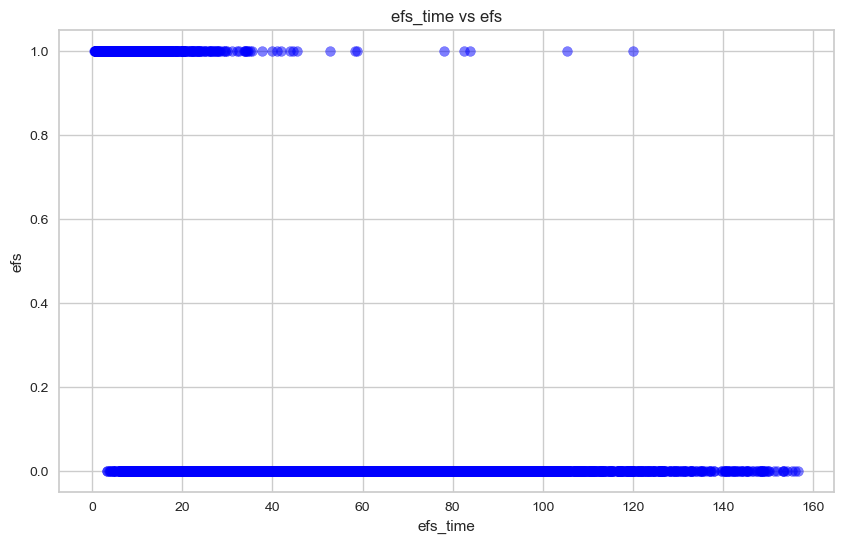

In [14]:
vz.scatter_plot(trainData,'efs_time','efs')

In [15]:
#inspecting missing values for the training set
missing_values = trainData.isnull().sum()
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

tce_match                 18996
mrd_hct                   16597
cyto_score_detail         11923
tce_div_match             11396
tce_imm_match             11133
cyto_score                 8068
hla_high_res_10            7163
hla_high_res_8             5829
hla_high_res_6             5284
hla_match_dqb1_high        5199
hla_low_res_10             5064
conditioning_intensity     4789
hla_match_c_high           4620
hla_match_a_high           4301
hla_nmdp_6                 4197
hla_match_dqb1_low         4194
hla_match_b_high           4088
hla_low_res_8              3653
hla_match_drb1_high        3352
hla_low_res_6              3270
hla_match_c_low            2800
hla_match_drb1_low         2643
hla_match_b_low            2565
cardiac                    2542
peptic_ulcer               2419
hla_match_a_low            2390
arrhythmia                 2202
rheum_issue                2183
rituximab                  2148
pulm_severe                2135
diabetes                   2119
psych_di

In [16]:
#inspecting missing values for the test set
missing_values_test = testData.isnull().sum()
missing_values_test = missing_values_test.sort_values(ascending=False)
print(missing_values_test)

cyto_score_detail         2
conditioning_intensity    2
mrd_hct                   2
cyto_score                2
tce_match                 2
donor_age                 2
hla_high_res_10           1
tce_div_match             1
tce_imm_match             1
hla_high_res_8            1
hla_match_c_high          1
prior_tumor               0
rheum_issue               0
hla_match_b_low           0
peptic_ulcer              0
age_at_hct                0
hla_match_a_low           0
hepatic_severe            0
gvhd_proph                0
ID                        0
hla_match_b_high          0
sex_match                 0
race_group                0
comorbidity_score         0
karnofsky_score           0
hepatic_mild              0
donor_related             0
melphalan_dose            0
hla_low_res_8             0
cardiac                   0
hla_match_drb1_high       0
pulm_moderate             0
hla_match_a_high          0
year_hct                  0
in_vivo_tcd               0
obesity             

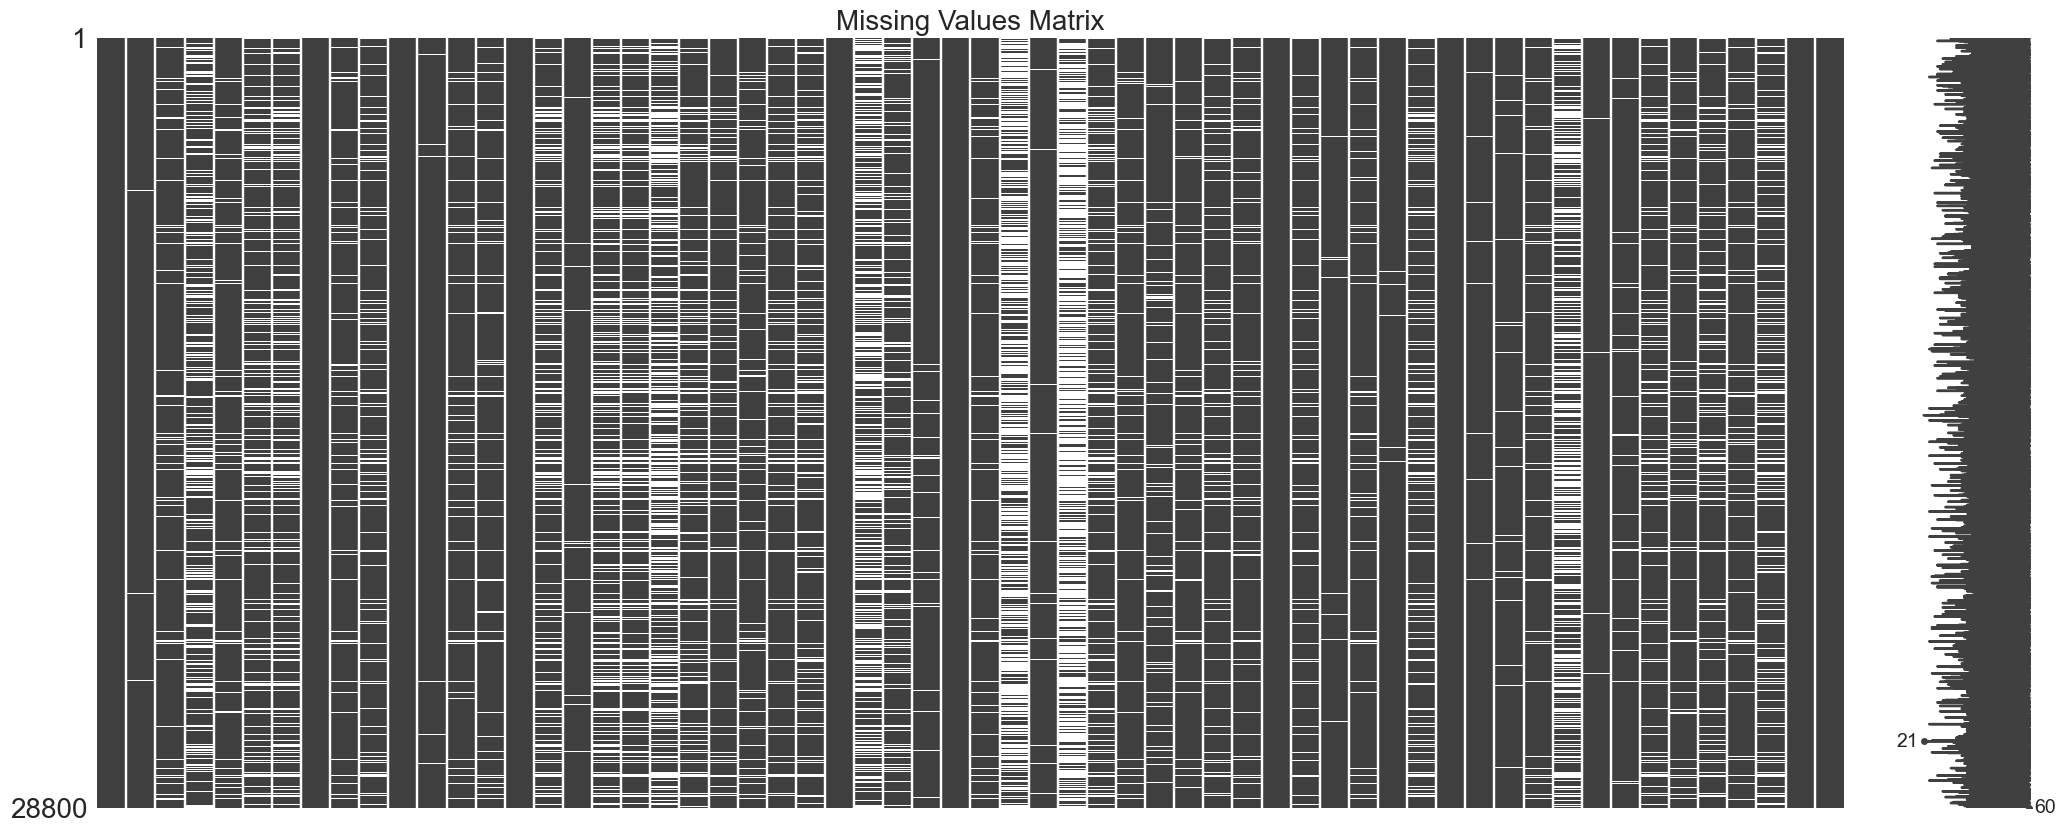

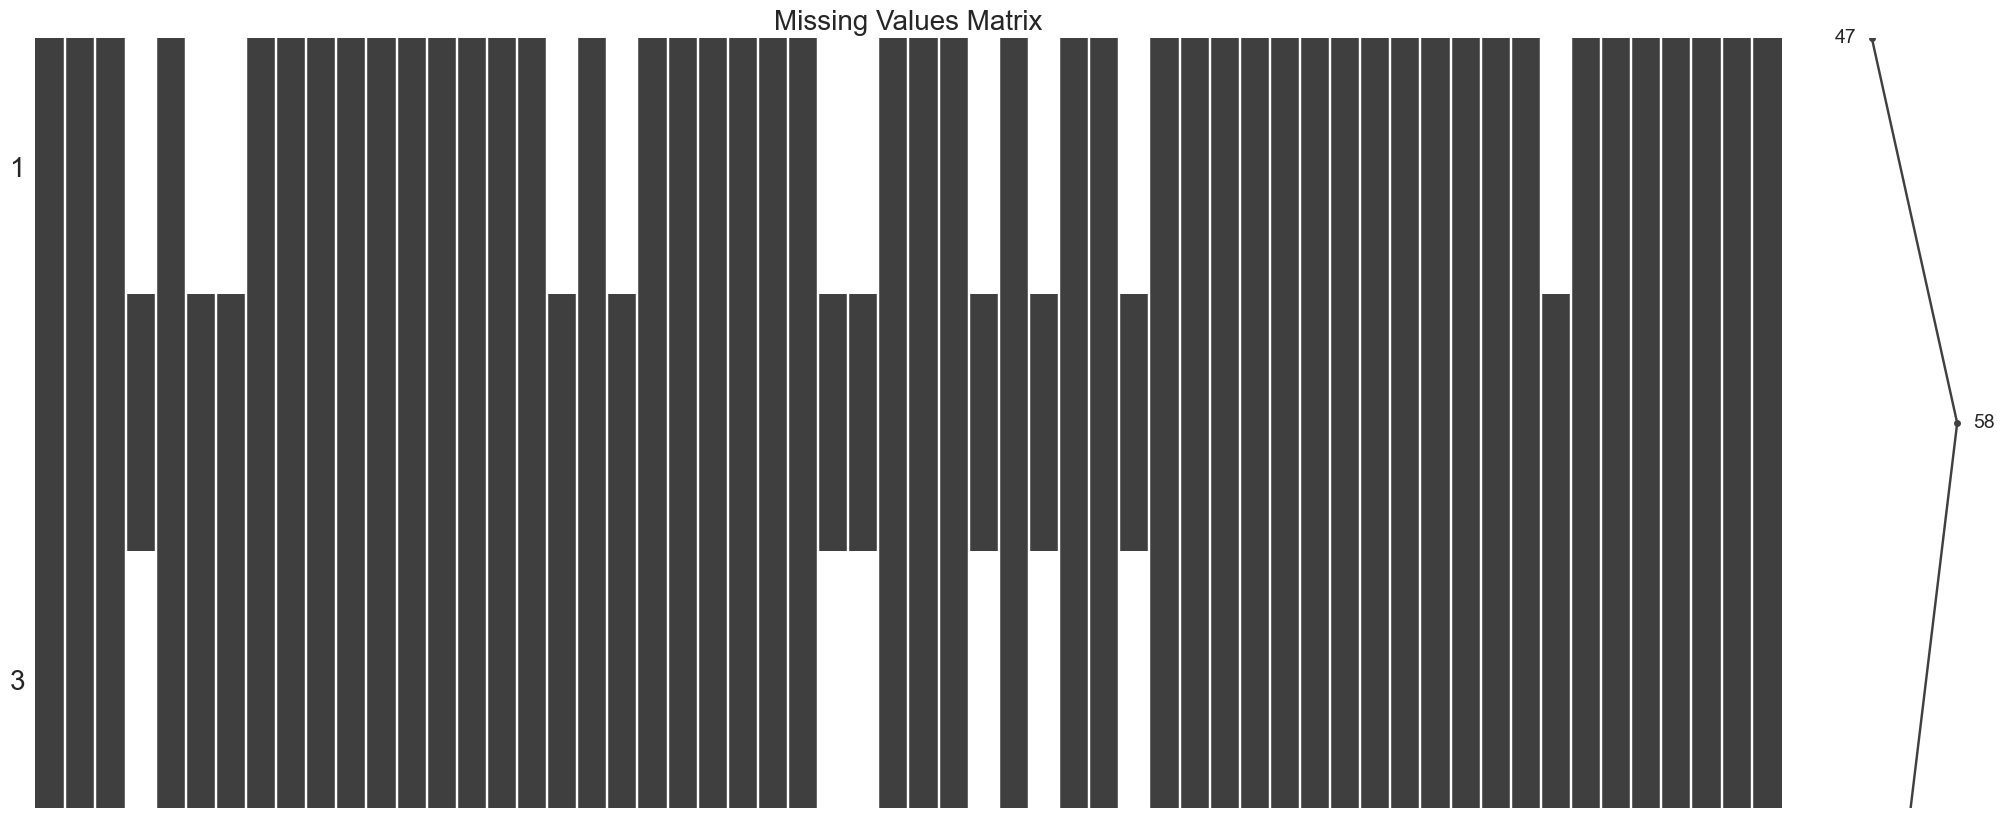

In [17]:
#plot the missing values heatmap
vz.plot_missing_values(trainData)
vz.plot_missing_values(testData)

Due to the large number of missing values and unclearness of the patterns in the values that are missing, regular imputation methods will not be considered to use as the training accuracy could be severly impaired.

In [18]:
#Understanding the missing values
missing_values = pp.missing_val_df(trainData)
missing_values = missing_values.merge(dataDict[['variable', 'description']], left_on='variables', right_on='variable', how='left')
missing_values.drop(columns=['variable'], inplace=True)
missing_values.rename(columns={'description': 'Variable Description'}, inplace=True)

missing_values

,variables,Missing Values,Missing Percent,Data Type,Variable Description
0,tce_match,18996,65.96,object,T-cell epitope matching
1,mrd_hct,16597,57.63,object,MRD at time of HCT (AML/ALL)
2,cyto_score_detail,11923,41.40,object,Cytogenetics for DRI (AML/MDS)
3,tce_div_match,11396,39.57,object,T-cell epitope matching
4,tce_imm_match,11133,38.66,object,T-cell epitope immunogenicity/diversity match
5,cyto_score,8068,28.01,object,Cytogenetic score
6,hla_high_res_10,7163,24.87,float64,Recipient / 1st donor allele-level (high resol...
7,hla_high_res_8,5829,20.24,float64,Recipient / 1st donor allele-level (high resol...
8,hla_high_res_6,5284,18.35,float64,Recipient / 1st donor allele-level (high resol...
9,hla_match_dqb1_high,5199,18.05,float64,Recipient / 1st donor allele level (high resol...


In [19]:
# Detect duplicate rows
duplicate_rows = trainData[trainData.duplicated()]
# Show duplicate rows
print(duplicate_rows)

Empty DataFrame
Columns: [ID, dri_score, psych_disturb, cyto_score, diabetes, hla_match_c_high, hla_high_res_8, tbi_status, arrhythmia, hla_low_res_6, graft_type, vent_hist, renal_issue, pulm_severe, prim_disease_hct, hla_high_res_6, cmv_status, hla_high_res_10, hla_match_dqb1_high, tce_imm_match, hla_nmdp_6, hla_match_c_low, rituximab, hla_match_drb1_low, hla_match_dqb1_low, prod_type, cyto_score_detail, conditioning_intensity, ethnicity, year_hct, obesity, mrd_hct, in_vivo_tcd, tce_match, hla_match_a_high, hepatic_severe, donor_age, prior_tumor, hla_match_b_low, peptic_ulcer, age_at_hct, hla_match_a_low, gvhd_proph, rheum_issue, sex_match, hla_match_b_high, race_group, comorbidity_score, karnofsky_score, hepatic_mild, tce_div_match, donor_related, melphalan_dose, hla_low_res_8, cardiac, hla_match_drb1_high, pulm_moderate, hla_low_res_10, efs, efs_time]
Index: []

[0 rows x 60 columns]


No duplicated observations is discovered in the dataset

# Data Preprocessing

In [20]:
X_train = trainData.drop(columns=['efs_time', 'efs','ID'])
y_train = trainData[['efs', 'efs_time']]
X_test = testData.drop(columns=['ID'])



In [21]:
#We will perform data preprocessing on the numerical variables and categorical variables separately.

X_train_num = pp.numeric_df(X_train)
X_test_num = pp.numeric_df(X_test)

cat_colsTrain = pp.get_cat_cols(X_train)
X_train_cat = X_train[cat_colsTrain]

cat_colsTest = pp.get_cat_cols(X_test)
X_test_cat = X_test[cat_colsTest]



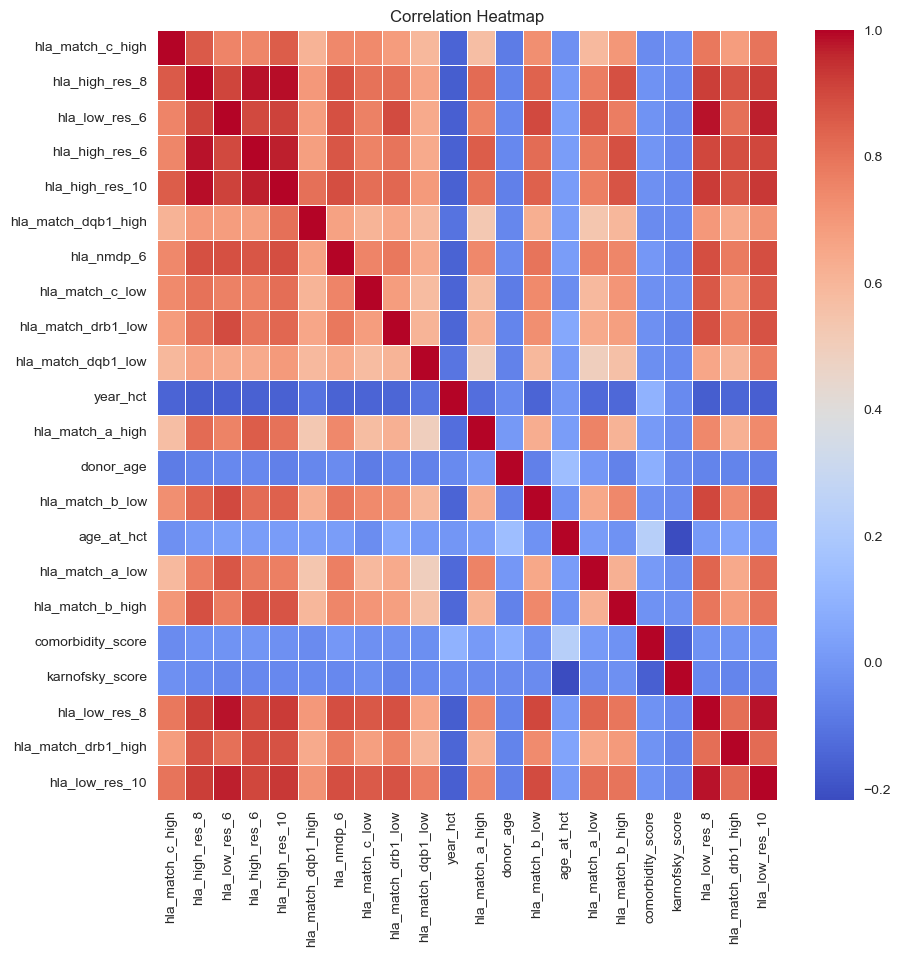

In [22]:
#Plot the correlation heatmap between numerical variables to check for multicollinearity, 
#before we decide on which imputation method to use.
vz.cor_heatmap(X_train_num)

As we can see, the variables that starts with "hla" seems to be highly correlated with on another, while the other variables do not exhibited clear correlation.
Therefore, we decided to employ KNN (similarity based) imputer on all the variables that start with "hla" and Iterative imputer for the rest of the variables.

In [23]:
hla_columns = [col for col in X_train_num.columns if col.startswith('hla_')]
hla_data = X_train_num[hla_columns]

hla_columns_test = [col for col in X_test_num.columns if col.startswith('hla_')]
hla_data_test = X_test_num[hla_columns_test]

imputer = KNNImputer(n_neighbors=3, weights="distance")  

hla_imputed = imputer.fit_transform(hla_data)
hla_imputed_test = imputer.fit_transform(hla_data_test)

X_train_num[hla_columns] = hla_imputed
X_test_num[hla_columns_test] = hla_imputed_test

print("After KNN Imputation (train):")
print(X_train_num[hla_columns].head())

After KNN Imputation (train):
   hla_match_c_high  hla_high_res_8  hla_low_res_6  hla_high_res_6  \
0               2.0             8.0            6.0             6.0   
1               2.0             8.0            6.0             6.0   
2               2.0             8.0            6.0             6.0   
3               2.0             8.0            6.0             6.0   
4               2.0             8.0            6.0             6.0   

   hla_high_res_10  hla_match_dqb1_high  hla_nmdp_6  hla_match_c_low  \
0             10.0                  2.0         6.0              2.0   
1             10.0                  2.0         6.0              2.0   
2             10.0                  2.0         6.0              2.0   
3             10.0                  2.0         6.0              2.0   
4             10.0                  2.0         5.0              2.0   

   hla_match_drb1_low  hla_match_dqb1_low  hla_match_a_high  hla_match_b_low  \
0                 2.0               

In [24]:
median_train = X_train_num.median()

X_train_num.fillna(median_train, inplace=True)
X_test_num.fillna(median_train, inplace=True)

In [25]:
X_train_num.isnull().sum()

hla_match_c_high       0
hla_high_res_8         0
hla_low_res_6          0
hla_high_res_6         0
hla_high_res_10        0
hla_match_dqb1_high    0
hla_nmdp_6             0
hla_match_c_low        0
hla_match_drb1_low     0
hla_match_dqb1_low     0
year_hct               0
hla_match_a_high       0
donor_age              0
hla_match_b_low        0
age_at_hct             0
hla_match_a_low        0
hla_match_b_high       0
comorbidity_score      0
karnofsky_score        0
hla_low_res_8          0
hla_match_drb1_high    0
hla_low_res_10         0
dtype: int64

In [26]:
X_train_num = X_train_num.astype('float32')
X_train_num.dtypes
X_test_num = X_test_num.astype('float32')


In [27]:
X_train_cat = X_train_cat.fillna('UNKNOWN')
X_test_cat = X_test_cat.fillna('UNKNOWN')

print(X_train_cat.isnull().sum())
print(X_test_cat.isnull().sum())


dri_score                 0
psych_disturb             0
cyto_score                0
diabetes                  0
tbi_status                0
arrhythmia                0
graft_type                0
vent_hist                 0
renal_issue               0
pulm_severe               0
prim_disease_hct          0
cmv_status                0
tce_imm_match             0
rituximab                 0
prod_type                 0
cyto_score_detail         0
conditioning_intensity    0
ethnicity                 0
obesity                   0
mrd_hct                   0
in_vivo_tcd               0
tce_match                 0
hepatic_severe            0
prior_tumor               0
peptic_ulcer              0
gvhd_proph                0
rheum_issue               0
sex_match                 0
race_group                0
hepatic_mild              0
tce_div_match             0
donor_related             0
melphalan_dose            0
cardiac                   0
pulm_moderate             0
dtype: int64
dri_sco

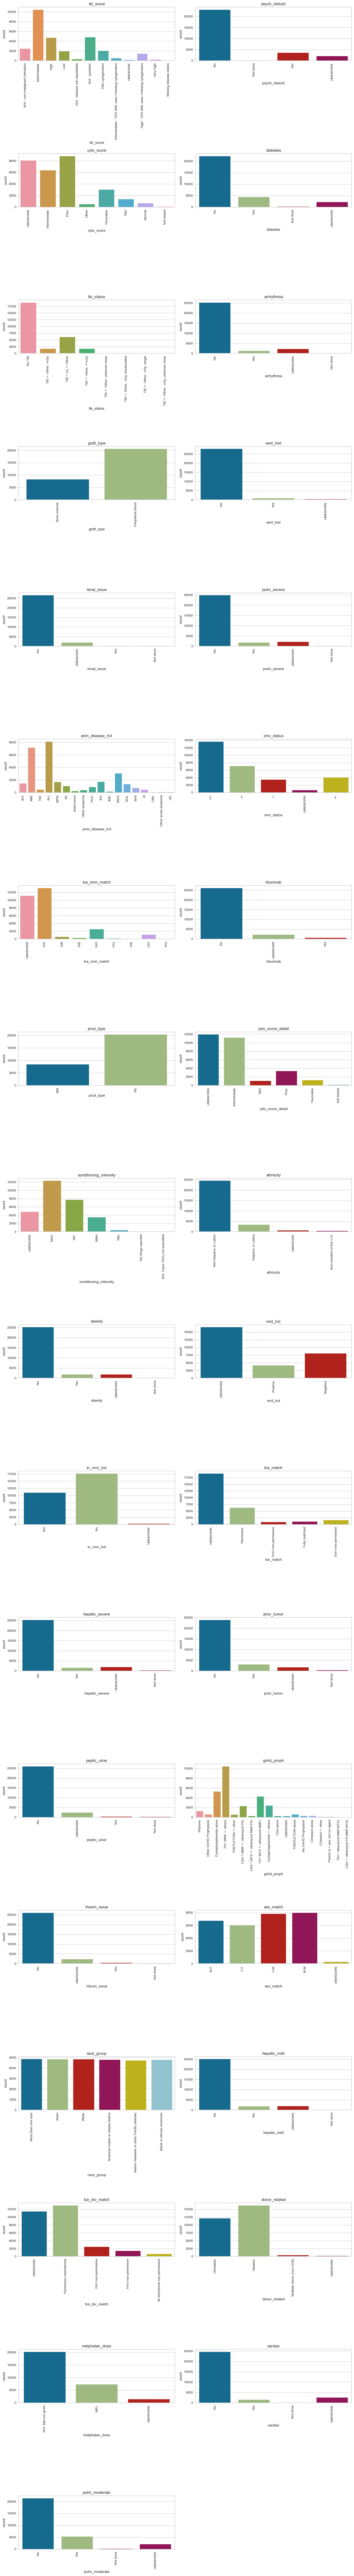

In [28]:
import math
n_cols = 2
n_plots = len(X_train_cat.columns)
n_rows = math.ceil(n_plots / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6 * n_rows))
axes = axes.flatten()

for i, cols in enumerate(X_train_cat.columns):
    sns.countplot(data=X_train_cat, x=cols, ax=axes[i])
    axes[i].set_title(cols)
    axes[i].tick_params(axis='x', rotation=90)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


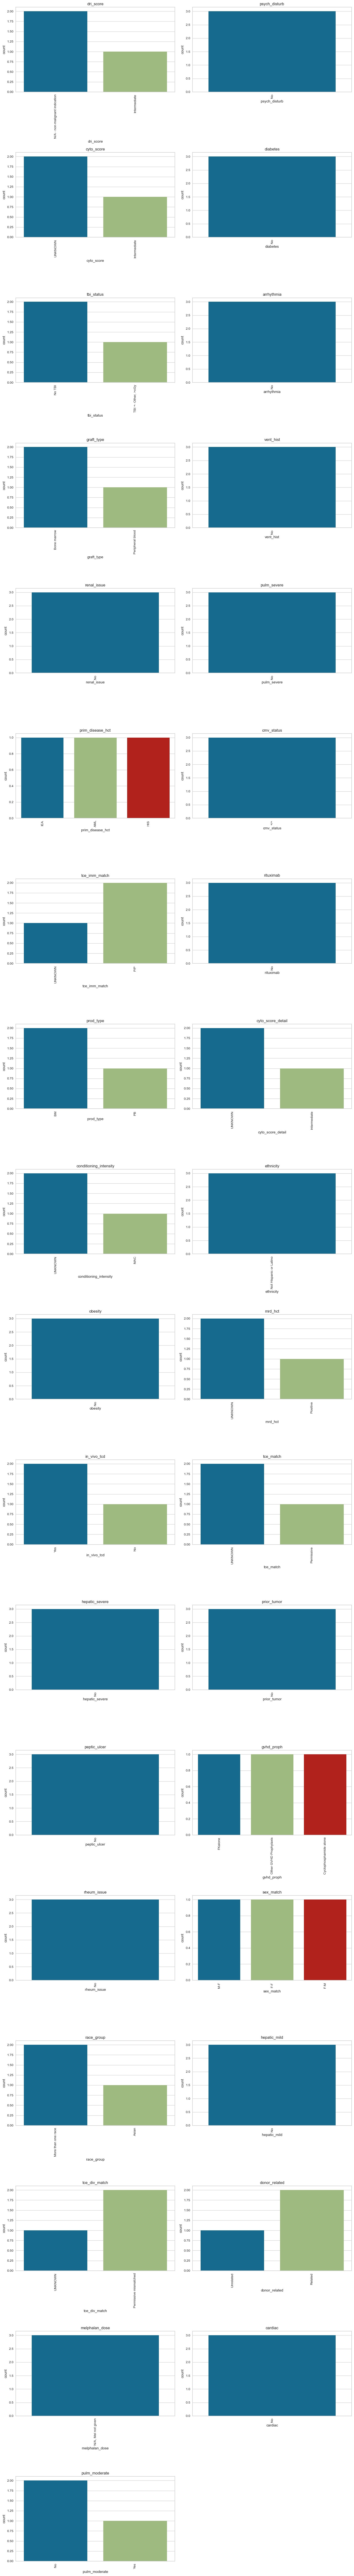

In [29]:
import math
n_cols = 2
n_plots = len(X_test_cat.columns)
n_rows = math.ceil(n_plots / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6 * n_rows))
axes = axes.flatten()

for i, cols in enumerate(X_test_cat.columns):
    sns.countplot(data=X_test_cat, x=cols, ax=axes[i])
    axes[i].set_title(cols)
    axes[i].tick_params(axis='x', rotation=90)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [30]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)

In [31]:
print(X_train.dtypes)
print(X_test.dtypes)


hla_match_c_high          float32
hla_high_res_8            float32
hla_low_res_6             float32
hla_high_res_6            float32
hla_high_res_10           float32
hla_match_dqb1_high       float32
hla_nmdp_6                float32
hla_match_c_low           float32
hla_match_drb1_low        float32
hla_match_dqb1_low        float32
year_hct                  float32
hla_match_a_high          float32
donor_age                 float32
hla_match_b_low           float32
age_at_hct                float32
hla_match_a_low           float32
hla_match_b_high          float32
comorbidity_score         float32
karnofsky_score           float32
hla_low_res_8             float32
hla_match_drb1_high       float32
hla_low_res_10            float32
dri_score                  object
psych_disturb              object
cyto_score                 object
diabetes                   object
tbi_status                 object
arrhythmia                 object
graft_type                 object
vent_hist     

In [32]:
print(X_train.isna().sum()) 

hla_match_c_high          0
hla_high_res_8            0
hla_low_res_6             0
hla_high_res_6            0
hla_high_res_10           0
hla_match_dqb1_high       0
hla_nmdp_6                0
hla_match_c_low           0
hla_match_drb1_low        0
hla_match_dqb1_low        0
year_hct                  0
hla_match_a_high          0
donor_age                 0
hla_match_b_low           0
age_at_hct                0
hla_match_a_low           0
hla_match_b_high          0
comorbidity_score         0
karnofsky_score           0
hla_low_res_8             0
hla_match_drb1_high       0
hla_low_res_10            0
dri_score                 0
psych_disturb             0
cyto_score                0
diabetes                  0
tbi_status                0
arrhythmia                0
graft_type                0
vent_hist                 0
renal_issue               0
pulm_severe               0
prim_disease_hct          0
cmv_status                0
tce_imm_match             0
rituximab           

In [33]:
print(X_test.isna().sum())  

hla_match_c_high          0
hla_high_res_8            0
hla_low_res_6             0
hla_high_res_6            0
hla_high_res_10           0
hla_match_dqb1_high       0
hla_nmdp_6                0
hla_match_c_low           0
hla_match_drb1_low        0
hla_match_dqb1_low        0
year_hct                  0
hla_match_a_high          0
donor_age                 0
hla_match_b_low           0
age_at_hct                0
hla_match_a_low           0
hla_match_b_high          0
comorbidity_score         0
karnofsky_score           0
hla_low_res_8             0
hla_match_drb1_high       0
hla_low_res_10            0
dri_score                 0
psych_disturb             0
cyto_score                0
diabetes                  0
tbi_status                0
arrhythmia                0
graft_type                0
vent_hist                 0
renal_issue               0
pulm_severe               0
prim_disease_hct          0
cmv_status                0
tce_imm_match             0
rituximab           

# Modeling

In [34]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_squared_error


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
def transform_suv_prob(df, time = 'efs_time', event = 'efs'):
    kmf = KaplanMeierFitter()
    kmf.fit(df[time], event_observed=df[event])
    survivals_prob = kmf.survival_function_at_times(df[time]).values
    return survivals_prob

In [ ]:
trainingVal = pd.concat([X_train, y_train], axis=1)
trainingVal['suv_prob'] = transform_suv_prob(trainingVal)


KeyError: 'y'

In [ ]:
RMV = ["ID","efs","efs_time","suv_prob"]
FEATURES = [c for c in trainingVal.columns if not c in RMV]
print(f"There are {len(FEATURES)} FEATURES: {FEATURES}")

There are 57 FEATURES: ['hla_match_c_high', 'hla_high_res_8', 'hla_low_res_6', 'hla_high_res_6', 'hla_high_res_10', 'hla_match_dqb1_high', 'hla_nmdp_6', 'hla_match_c_low', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'year_hct', 'hla_match_a_high', 'donor_age', 'hla_match_b_low', 'age_at_hct', 'hla_match_a_low', 'hla_match_b_high', 'comorbidity_score', 'karnofsky_score', 'hla_low_res_8', 'hla_match_drb1_high', 'hla_low_res_10', 'dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'tbi_status', 'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'cmv_status', 'tce_imm_match', 'rituximab', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hepatic_severe', 'prior_tumor', 'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match', 'race_group', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moderate']


In [ ]:
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_seed)